In [87]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [89]:
from sklearn import datasets
file = "../data/dexcomData.csv"

In [90]:
glucose = pd.read_csv(file)

In [91]:
glucose.head()

,Blood Glucose (mg/dL),Rate (mg/dL/min),Timestamp
0,206.0,0.4,2018-10-27 21:27:07
1,205.0,0.3,2018-10-27 21:22:07
2,203.0,0.1,2018-10-27 21:17:07
3,202.0,0.1,2018-10-27 21:12:07
4,202.0,0.1,2018-10-27 21:07:07


In [92]:
glucose.sort_values('Timestamp')

,Blood Glucose (mg/dL),Rate (mg/dL/min),Timestamp
73525,72.0,0.8,2017-09-11 22:22:07
73524,78.0,1.2,2017-09-11 22:26:59
73523,69.0,0.6,2017-09-11 22:31:59
73522,70.0,12.7,2017-09-11 22:36:58
73521,61.0,12.7,2017-09-11 22:41:59
73520,39.0,-2.1,2017-09-11 22:46:59
73519,39.0,-2.2,2017-09-11 22:51:59
73518,39.0,-2.1,2017-09-11 22:56:58
73517,39.0,-0.8,2017-09-11 23:01:59
73516,39.0,-1.0,2017-09-11 23:06:59


In [123]:
glucose['Timestamp'] = pd.to_datetime(glucose['Timestamp'])

In [124]:
glucose['Timestamp'] = glucose['Timestamp'].dt.strftime('%Y%m%d').astype(float)

In [125]:
glucose.set_index('Timestamp')

,Blood Glucose (mg/dL),Rate (mg/dL/min)
Timestamp,,
19700101.0,206.0,0.4
19700101.0,205.0,0.3
19700101.0,203.0,0.1
19700101.0,202.0,0.1
19700101.0,202.0,0.1
19700101.0,202.0,0.3
19700101.0,201.0,0.4
19700101.0,200.0,0.5
19700101.0,199.0,0.7


In [147]:
x = glucose.drop('Rate (mg/dL/min)', axis = 1)

In [148]:
y = glucose['Blood Glucose (mg/dL)']

In [149]:
x.head()
type(x['Timestamp'][0])

,Blood Glucose (mg/dL),Timestamp
0,206.0,19700101.0
1,205.0,19700101.0
2,203.0,19700101.0
3,202.0,19700101.0
4,202.0,19700101.0


numpy.float64

In [150]:
y.head()

0    206.0
1    205.0
2    203.0
3    202.0
4    202.0
Name: Blood Glucose (mg/dL), dtype: float64

In [151]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(51468, 2)

(22058, 2)

(51468,)

(22058,)

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [153]:
lm = LinearRegression()

In [154]:
lm_lasso = Lasso()

In [155]:
lm_ridge = Ridge()

In [156]:
lm_elastic = ElasticNet()

In [157]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [158]:
lm_lasso

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [159]:
lm_ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [160]:
lm_elastic

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [161]:
lm.fit(train_x, train_y)
lm_lasso.fit(train_x, train_y)
lm_ridge.fit(train_x, train_y)
lm_elastic.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

<Figure size 1080x720 with 0 Axes>

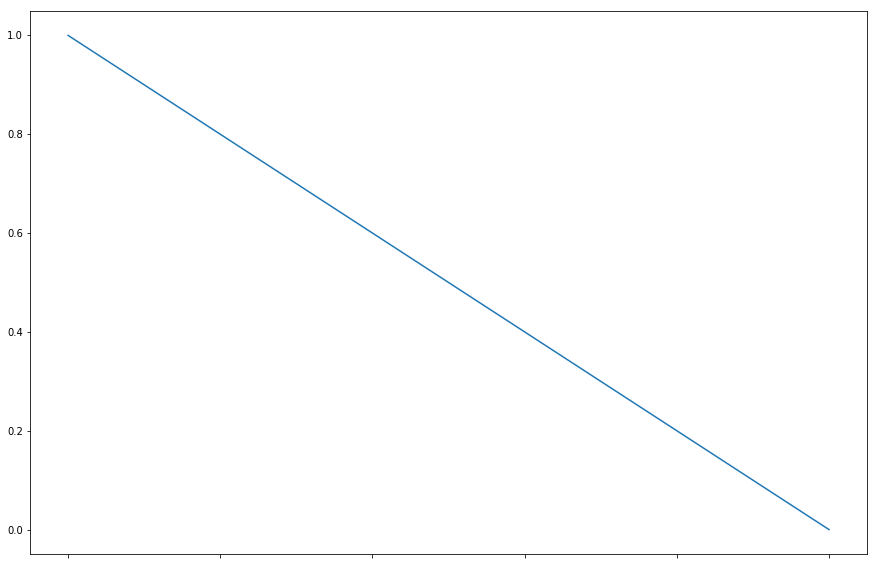

In [162]:
plt.figure(figsize=(15,10))
ft_importances_lm = pd.Series(lm.coef_, index= x.columns)
ft_importances_lm.plot(kind='line')
plt.show()